In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import matplotlib.cm as cm
import matplotlib as mpl

#Nice Patterns, given a number "binarily"
#[0, 1, 0, 0, 0, 0, 1] 33
#[1, 0, 1, 1, 1, 1, 0] 94
#[0, 1, 1, 1, 1, 0, 0] 60
#[1, 1, 0, 1, 1, 1, 1] 111
#[0, 0, 1, 0, 0, 0, 0] 16
#[0, 1, 1, 1, 1, 1, 0] 62

In [142]:
rows = 200
columns = 200

numGraphs = 20
timesteps = 50000

colors = ['white', 'green', 'blue', 'yellow', 'brown','black', 'red']
bounds = [0,1,2,3,4,5,6,7]

In [143]:
def painter(timesteps, boolArr):
    paintBoard = np.zeros(shape=(rows, columns), dtype=int)
    startPos = math.floor(len(paintBoard)/2)
    currX = startPos
    currY = startPos

    prevX = startPos
    prevY = startPos + 1 

    countif = 0
    countelse = 0
    
    for step in range(0,timesteps):
        if currX == rows or currY == columns:
            break
        else:            
            if(boolArr[paintBoard[currX][currY]]):
                countif+=1
                paintBoard[currX][currY]+=1

                if(paintBoard[currX][currY]> len(colors)):
                    paintBoard[currX][currY]=0


                xChange = currX - prevX
                yChange = currY - prevY

                if(xChange == 0):

                    if(yChange > 0):
                        prevX = currX
                        prevY = currY
                        currX = currX + 1

                    if(yChange < 0):
                        prevX = currX
                        prevY = currY
                        currX = currX -1

                if(xChange < 0):
                        prevX = currX
                        prevY = currY
                        currY = currY + 1


                if(xChange > 0):
                        prevX = currX
                        prevY = currY
                        currY = currY - 1
            else:
                countelse+=1
                paintBoard[currX][currY]+=1

                if(paintBoard[currX][currY] > len(colors)):
                    paintBoard[currX][currY]=0

                xChange = currX - prevX
                yChange = currY - prevY

                if(xChange == 0):
                    if(yChange > 0):
                        prevX = currX
                        prevY = currY
                        currX = currX - 1

                    if(yChange < 0):
                        prevX = currX
                        prevY = currY
                        currX = currX + 1

                if(xChange < 0):
                        prevX = currX
                        prevY = currY
                        currY = currY - 1


                if(xChange > 0):
                        prevX = currX
                        prevY = currY
                        currY = currY + 1
                        
    return paintBoard, countif, countelse

[1 0 0 0 1 0 0 0]
13493 36507


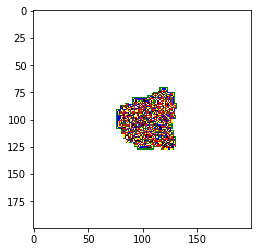

[0 1 1 1 0 1 0 0]
26067 23933


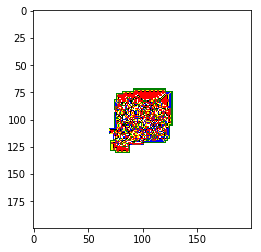

[1 1 0 0 0 1 1 0]
25574 24426


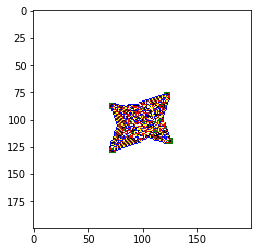

[0 0 1 1 0 1 0 0]
18818 31182


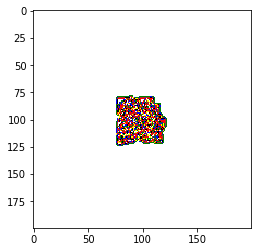

[0 1 0 1 1 1 1 0]
30832 19168


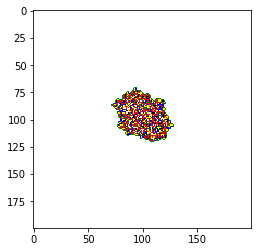

[0 0 1 1 1 0 1 0]
24678 25322


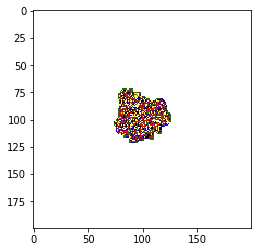

[0 1 1 1 1 0 0 0]
25448 24552


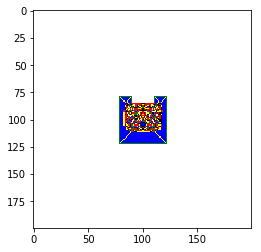

[0 0 0 0 0 0 1 1]
12412 37588


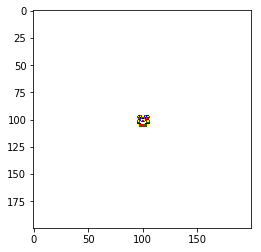

[1 1 0 1 1 1 0 0]
8575 3672


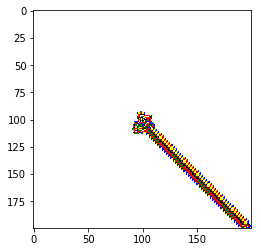

[0 0 0 1 1 1 1 0]
24437 25563


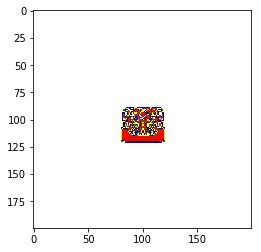

[0 0 1 0 0 0 1 0]
12074 37926


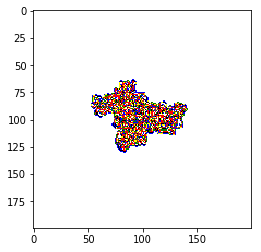

[0 0 0 1 0 1 1 1]
23544 26456


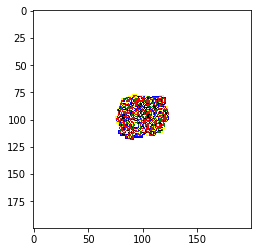

[0 1 1 0 0 1 1 1]
30030 19970


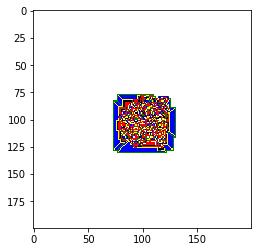

[1 0 0 0 1 1 0 0]
19568 30432


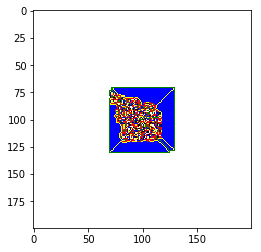

[0 0 0 1 1 1 0 0]
18270 31730


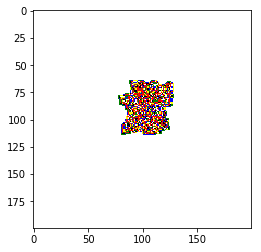

[1 1 1 1 1 0 0 0]
4059 1284


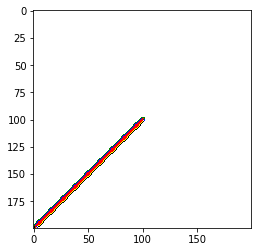

[0 0 1 0 1 0 0 0]
12661 37339


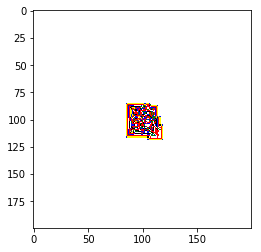

[0 0 1 1 1 1 0 0]
24966 25034


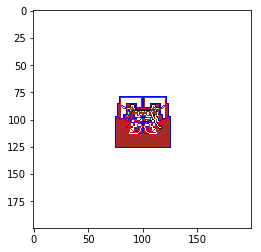

[0 0 1 1 0 1 0 0]
18818 31182


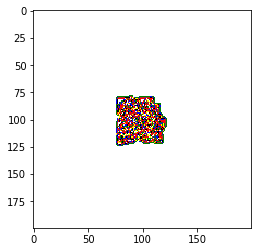

[0 0 0 0 0 0 1 1]
12412 37588


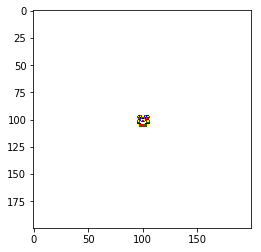

In [144]:
#Feel free to try out different starting states with ownArr = 1
ownArr = 0
randArr = 1

if ownArr == 1:
    boolArr = [[1, 1, 1, 1, 1, 0, 1],
               [0, 1, 0, 0, 0, 0, 1], 
               [1, 0, 1, 1, 1, 1, 0], 
               [0, 1, 1, 1, 1, 0, 0], 
               [1, 1, 0, 1, 1, 1, 1],
               [0, 0, 1, 0, 0, 0, 0],
               [0, 1, 1, 1, 1, 1, 0]]

if randArr == 1:
    boolArr = []
    for i in range(0, numGraphs):
        boolArr.append(np.random.randint(2, size=8))

for graph in range(0,len(boolArr)):
    
    print(boolArr[graph])
    
    paintBoard, countif, countelse = painter(timesteps, boolArr[graph])
    print(countif,countelse)

    cmap = mpl.colors.ListedColormap(colors)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    #plt.imshow(paintBoard, interpolation='nearest')
    #plt.show()
    plt.imshow(paintBoard, interpolation='nearest', cmap=cmap, norm=norm)
    plt.show()